In [10]:
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ERICK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ERICK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 200

tv = np.random.uniform(0, 300, n_samples)
radio = np.random.uniform(0, 50, n_samples)
newspaper = np.random.uniform(0, 100, n_samples)

sales = 0.05*tv + 0.2*radio + 0.1*newspaper + np.random.normal(0, 3, n_samples)

df_advertisement = pd.DataFrame({
    'TV': tv,
    'Radio': radio,
    'Newspaper': newspaper,
    'Sales': sales
})

df_advertisement.to_csv('advertising.csv', index=False)

print("Dataset creado y guardado como 'advertising.csv'")
print("\nPrimeras 5 filas del dataset:")
print(df_advertisement.head())

Dataset creado y guardado como 'advertising.csv'

Primeras 5 filas del dataset:
           TV      Radio  Newspaper      Sales
0  112.362036  32.101582  10.312387  11.478884
1  285.214292   4.206998  90.255291  21.749025
2  219.598183   8.081436  50.525237  17.327629
3  179.597545  44.927709  82.645747  23.124267
4   46.805592  30.321453  32.004960   9.944118


Valores nulos en el dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Estadísticas descriptivas:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   145.201870   25.218757   52.067278   17.332084
std     88.467429   14.650060   30.730879    6.528835
min      1.656635    0.253079    1.083765   -0.759450
25%     68.574724   13.073125   25.552032   12.090568
50%    148.345876   27.081994   52.539948   17.292414
75%    227.057885   37.109966   81.111489   21.910643
max    296.066081   49.525257   99.971767   32.005998


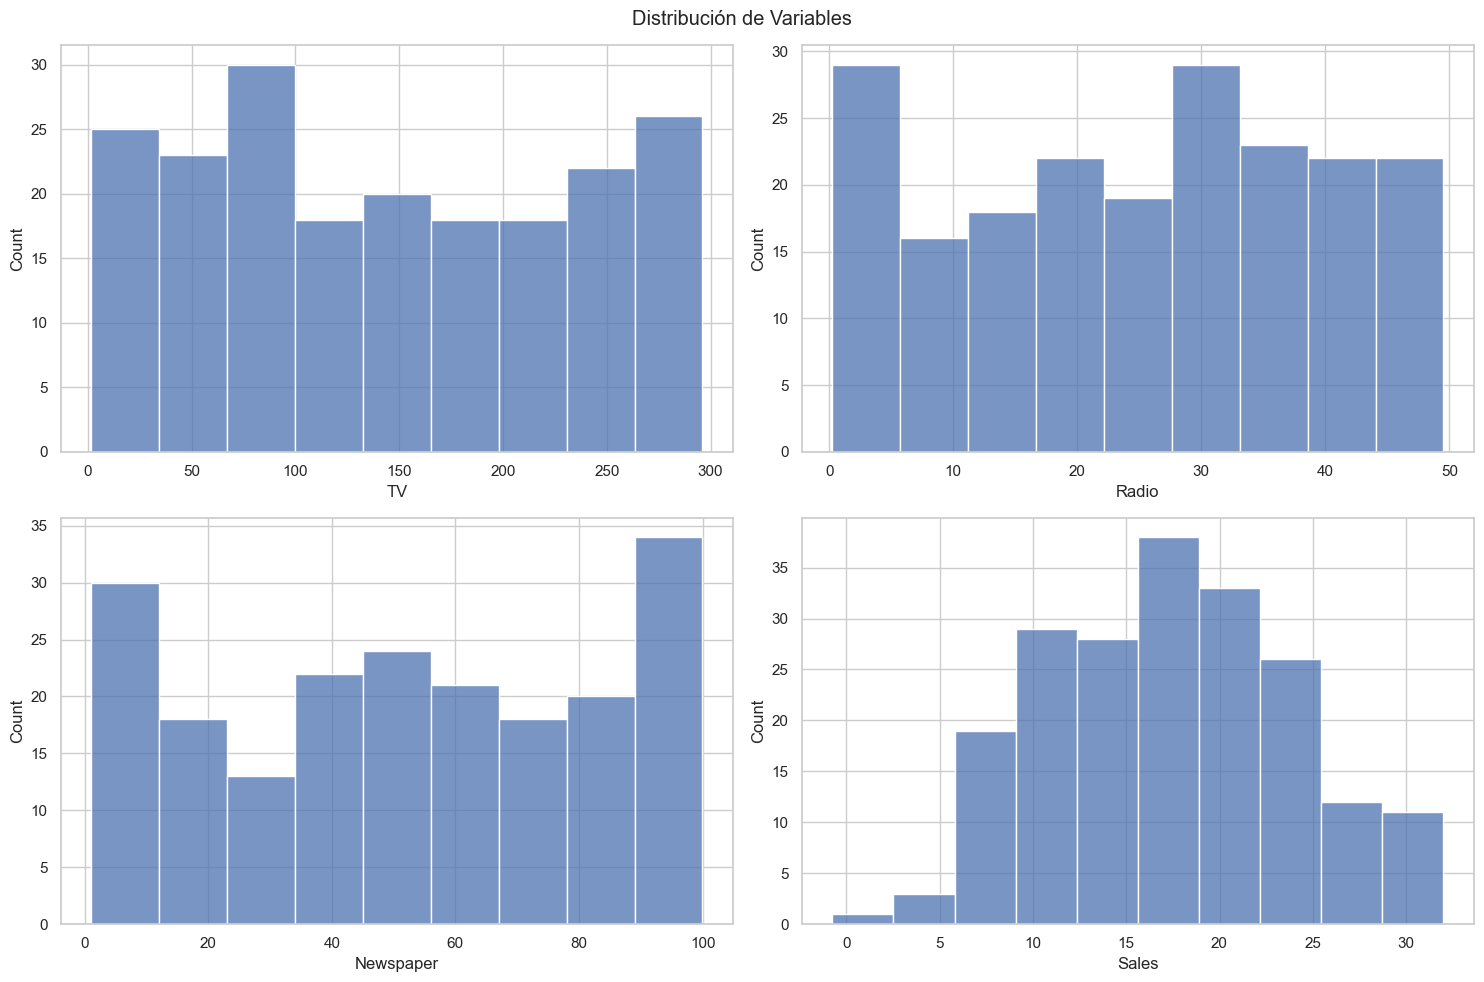

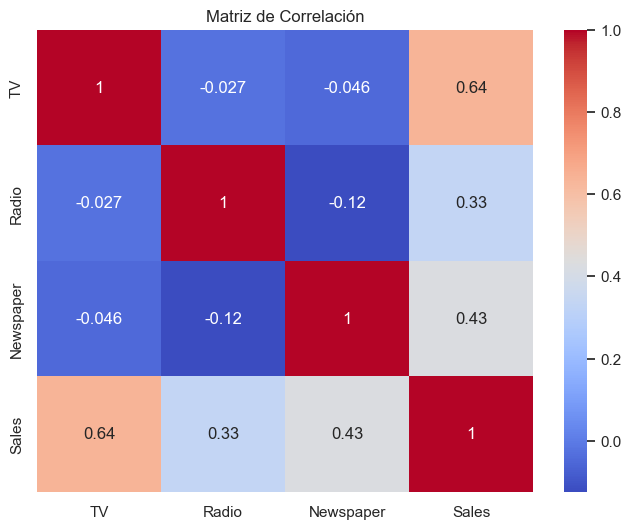

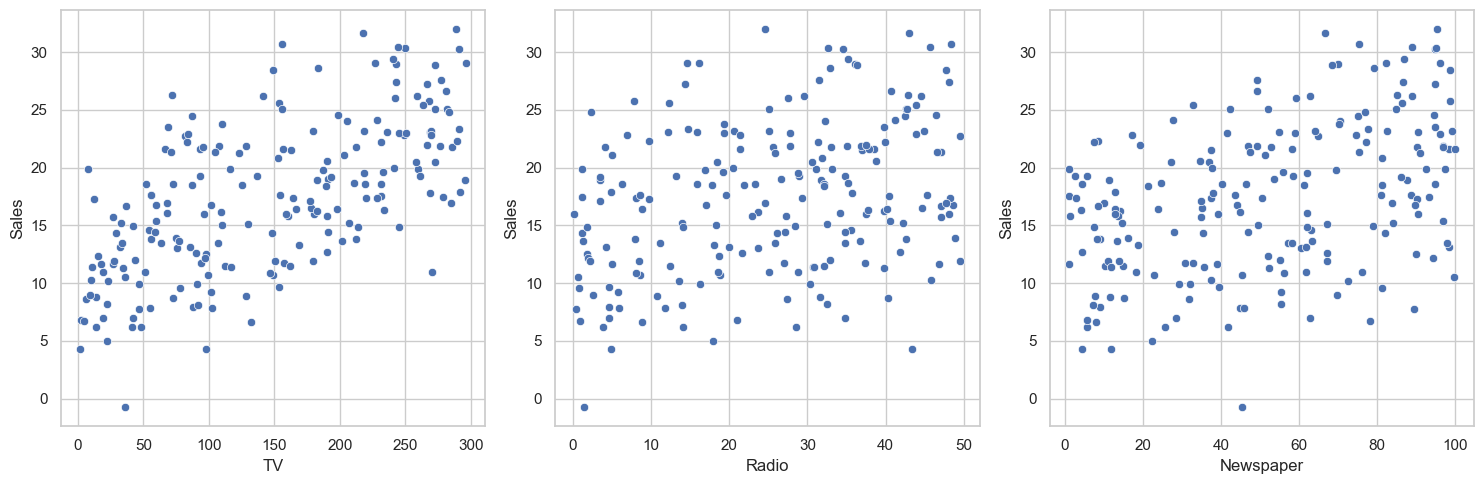


Resultados del modelo inicial:
R² Score: 0.8740
MSE: 6.0874
MAE: 2.0133


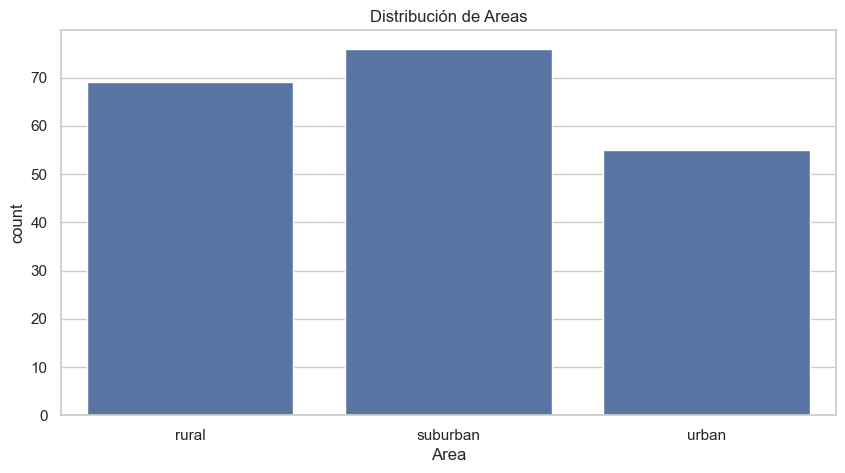


Resultados del modelo con variable Area:
R² Score: 0.8741
MSE: 6.0813
MAE: 2.0575


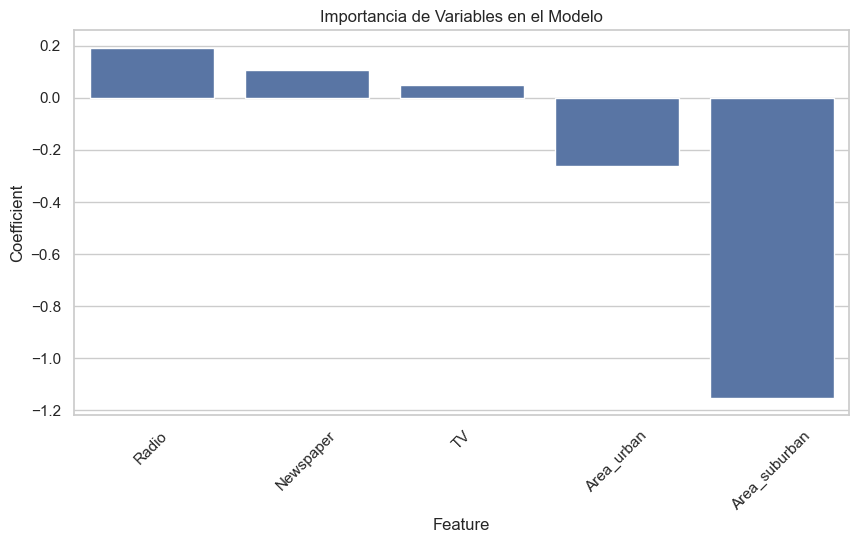

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm


np.random.seed(42)
n_samples = 200

tv = np.random.uniform(0, 300, n_samples)
radio = np.random.uniform(0, 50, n_samples)
newspaper = np.random.uniform(0, 100, n_samples)

sales = 0.05*tv + 0.2*radio + 0.1*newspaper + np.random.normal(0, 3, n_samples)

df_advertisement = pd.DataFrame({
    'TV': tv,
    'Radio': radio,
    'Newspaper': newspaper,
    'Sales': sales
})

print("Valores nulos en el dataset:")
print(df_advertisement.isnull().sum())

print("\nEstadísticas descriptivas:")
print(df_advertisement.describe())


sns.set_theme(style="whitegrid")  

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables')

sns.histplot(data=df_advertisement, x='TV', ax=axes[0,0])
sns.histplot(data=df_advertisement, x='Radio', ax=axes[0,1])
sns.histplot(data=df_advertisement, x='Newspaper', ax=axes[1,0])
sns.histplot(data=df_advertisement, x='Sales', ax=axes[1,1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_advertisement.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df_advertisement, x='TV', y='Sales', ax=axes[0])
sns.scatterplot(data=df_advertisement, x='Radio', y='Sales', ax=axes[1])
sns.scatterplot(data=df_advertisement, x='Newspaper', y='Sales', ax=axes[2])
plt.tight_layout()
plt.show()


X = df_advertisement[['TV', 'Radio', 'Newspaper']]
y = df_advertisement['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nResultados del modelo inicial:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

np.random.seed(42)
n_samples = len(df_advertisement)

z_scores = np.random.normal(0, 1, n_samples)
area_bins = [-np.inf, -0.43, 0.43, np.inf]
area_labels = ['rural', 'suburban', 'urban']
df_advertisement['Area'] = pd.cut(z_scores, bins=area_bins, labels=area_labels)

plt.figure(figsize=(10, 5))
sns.countplot(data=df_advertisement, x='Area')
plt.title('Distribución de Areas')
plt.show()

area_dummies = pd.get_dummies(df_advertisement['Area'], prefix='Area')
area_dummies = area_dummies.drop('Area_rural', axis=1)  
df_with_area = pd.concat([df_advertisement, area_dummies], axis=1)

X_area = df_with_area[['TV', 'Radio', 'Newspaper', 'Area_suburban', 'Area_urban']]
y_area = df_with_area['Sales']

X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_area, 
                                                                        test_size=0.1, 
                                                                        random_state=42)

model_area = LinearRegression()
model_area.fit(X_train_area, y_train_area)

y_pred_area = model_area.predict(X_test_area)

print("\nResultados del modelo con variable Area:")
print(f"R² Score: {r2_score(y_test_area, y_pred_area):.4f}")
print(f"MSE: {mean_squared_error(y_test_area, y_pred_area):.4f}")
print(f"MAE: {mean_absolute_error(y_test_area, y_pred_area):.4f}")

feature_importance = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper', 'Area_suburban', 'Area_urban'],
    'Coefficient': model_area.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance, x='Feature', y='Coefficient')
plt.title('Importancia de Variables en el Modelo')
plt.xticks(rotation=45)
plt.show()